In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
% matplotlib inline

UsageError: Line magic function `%` not found.


## EDA

Loading the dataset

In [3]:
dataset = pd.read_csv(Path.cwd().parent.joinpath("data", "cleaned_data.csv"))
dataset.head()

,year,month,var,value
0,1999,1,imae,52.197280
1,1999,2,imae,48.747353
2,1999,3,imae,50.386924
3,1999,4,imae,47.016367
4,1999,5,imae,48.617007


 We transform it to wide format

In [4]:
dataset_wide = pd.pivot(dataset, index=["year", "month"], columns='var', values='value').reset_index()
dataset_wide.loc[:, "date"] = dataset_wide.loc[:, "year"].astype(str) + "-" + dataset_wide.loc[:, "month"].astype(str)
dataset_wide.loc[:, "date"] = pd.to_datetime(dataset_wide.loc[:, "date"] )
dataset_wide.head()

var,year,month,crude_oil_brent,crude_oil_wti,exp,gas_henry_hub,gold,imae,imp,mil_count,...,tc_monex,tc_sell,tpm,treasury1year,treasury3month,treasury4week,treasury6month,usdollar_euro,yuan_dollar_spot_tc,date
0,1999,1,11.114500,12.514737,528.559625,1.849474,NaN,52.197280,539.682000,NaN,...,NaN,NaN,NaN,4.312105,4.335263,NaN,4.328947,1.159095,8.278921,1999-01-01
1,1999,2,10.271579,12.013684,572.454746,1.771053,NaN,48.747353,531.069894,NaN,...,NaN,NaN,NaN,4.478421,4.438421,NaN,4.441053,1.120279,8.278137,1999-02-01
2,1999,3,12.511304,14.676522,585.525887,1.791739,NaN,50.386924,599.843900,NaN,...,NaN,NaN,NaN,4.532609,4.440870,NaN,4.466957,1.088587,8.279152,1999-03-01
3,1999,4,15.294500,17.312381,628.716318,2.150000,NaN,47.016367,489.165203,NaN,...,NaN,NaN,NaN,4.450909,4.289545,NaN,4.371364,1.070050,8.279186,1999-04-01
4,1999,5,15.225263,17.718500,554.241723,2.260000,NaN,48.617007,518.387293,NaN,...,NaN,NaN,NaN,4.597000,4.498500,NaN,4.559000,1.063005,8.278535,1999-05-01


The shape

In [5]:
dataset_wide.shape

(285, 23)

### plots

First the exports and imports flows. We can see to moments with a big drop, the recession and the covid

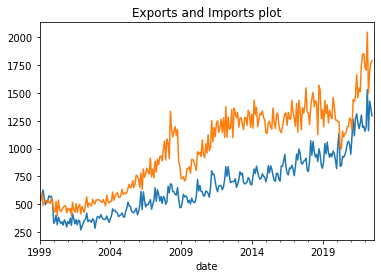

In [6]:
plt.title("Exports and Imports plot")
dataset_wide.set_index("date")["exp"].plot()
dataset_wide.set_index("date")["imp"].plot()
plt.show()

The gasoline and oil vars

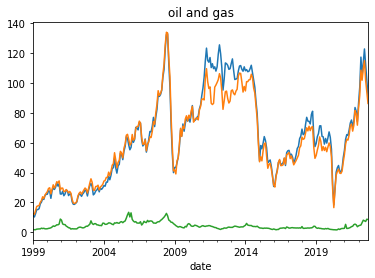

In [7]:
plt.title("oil and gas")
dataset_wide.set_index("date")["crude_oil_brent"].plot()
dataset_wide.set_index("date")["crude_oil_wti"].plot()
dataset_wide.set_index("date")["gas_henry_hub"].plot()
plt.show()

treasure variables

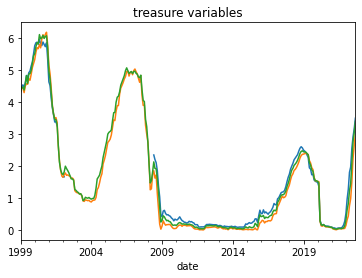

In [8]:
plt.title("treasure variables")
dataset_wide.set_index("date")["treasury1year"].plot()
dataset_wide.set_index("date")["treasury3month"].plot()
dataset_wide.set_index("date")["treasury6month"].plot()
plt.show()

As they are, basically, equals we select only the 3 month frecuency

Let check for the Nans

In [9]:
dataset_wide.isna().sum()

var
year                        0
month                       0
crude_oil_brent             0
crude_oil_wti               0
exp                         2
gas_henry_hub               0
gold                       68
imae                        2
imp                         2
mil_count                 127
monex_amount_mean         107
nominal_broad_usdollar     84
tc_buy                     92
tc_monex                  107
tc_sell                    91
tpm                        86
treasury1year              79
treasury3month              0
treasury4week              30
treasury6month              0
usdollar_euro               0
yuan_dollar_spot_tc         0
date                        0
dtype: int64

The last two months of exp are nan

In [15]:
dataset_wide.set_index("date").loc[:, ["exp"]].isna()

var,exp
date,
1999-01-01,False
1999-02-01,False
1999-03-01,False
1999-04-01,False
1999-05-01,False
...,...
2022-05-01,False
2022-06-01,False
2022-07-01,False


We create our finally dataset in wide format, with the log of exp as the first column

In [20]:
final_dataset = dataset_wide.loc[:, ["date", "exp", "imp", "imae", "crude_oil_brent", "gas_henry_hub", "treasury3month", "yuan_dollar_spot_tc", "year", "month"]]
final_dataset

var,date,exp,imp,imae,crude_oil_brent,gas_henry_hub,treasury3month,yuan_dollar_spot_tc,year,month
0,1999-01-01,528.559625,539.682000,52.197280,11.114500,1.849474,4.335263,8.278921,1999,1
1,1999-02-01,572.454746,531.069894,48.747353,10.271579,1.771053,4.438421,8.278137,1999,2
2,1999-03-01,585.525887,599.843900,50.386924,12.511304,1.791739,4.440870,8.279152,1999,3
3,1999-04-01,628.716318,489.165203,47.016367,15.294500,2.150000,4.289545,8.279186,1999,4
4,1999-05-01,554.241723,518.387293,48.617007,15.225263,2.260000,4.498500,8.278535,1999,5
...,...,...,...,...,...,...,...,...,...,...
280,2022-05-01,1428.113760,1694.630314,110.021136,113.337619,8.144762,0.983333,6.698957,2022,5
281,2022-06-01,1363.141884,1767.376705,110.299335,122.710952,7.703333,1.494762,6.695190,2022,6
282,2022-07-01,1294.293181,1789.115105,108.781981,111.925714,7.284500,2.232500,6.735155,2022,7
283,2022-08-01,NaN,NaN,NaN,100.446364,8.805652,2.630870,6.800678,2022,8


we split the data into log form for exp and imp

In [21]:
final_dataset1 = final_dataset

In [22]:
final_dataset2 = final_dataset.assign(exp=lambda x: np.log(x["exp"]),
                                      imp=lambda x: np.log(x["imp"]))

We save both

In [25]:
with Path.cwd().parent.joinpath("input", "data4x_norm.csv") as e:
    final_dataset1.to_csv(e, index=False)
with Path.cwd().parent.joinpath("input", "data4x_log.csv") as e:
    final_dataset2.to_csv(e, index=False)